# Python Excercise #0

##### Load in the relevant libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Load in data and modify for usability.

In [2]:
df = pd.read_csv('Data Files/olympics.csv', header=4).dropna()
df

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


##### Update columns based on assignment.
###### This is a dataframe type object.

In [3]:
cols = ['Edition', 'City', 'Athlete', 'Medal']
df_reduced = df[cols]
print(df_reduced)
print(type(df_reduced))

       Edition     City               Athlete   Medal
0         1896   Athens         HAJOS, Alfred    Gold
1         1896   Athens      HERSCHMANN, Otto  Silver
2         1896   Athens     DRIVAS, Dimitrios  Bronze
3         1896   Athens    MALOKINIS, Ioannis    Gold
4         1896   Athens    CHASAPIS, Spiridon  Silver
...        ...      ...                   ...     ...
29211     2008  Beijing        ENGLICH, Mirko  Silver
29212     2008  Beijing  MIZGAITIS, Mindaugas  Bronze
29213     2008  Beijing       PATRIKEEV, Yuri  Bronze
29214     2008  Beijing         LOPEZ, Mijain    Gold
29215     2008  Beijing        BAROEV, Khasan  Silver

[29216 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>


##### Display the first 5 lines.

In [4]:
df.head(5)

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


##### What events did Phelps win?

In [5]:
phelps_row = df[df['Athlete'].str.contains('PHELPS, Michael')]
print(f"Michael Phelps won medals in the following events:")
for event in phelps_row['Event'].unique():
    print(f"\t{event}")

Michael Phelps won medals in the following events:
	100m butterfly
	200m butterfly
	200m freestyle
	200m individual medley
	400m individual medley
	4x100m freestyle relay
	4x100m medley relay
	4x200m freestyle relay


##### Female gold medal winners.

In [6]:
female_gold_100m = df[(df['Gender'] == 'Women') & (df['Event'] == '100m') &\
                       (df['Medal'] == 'Gold')].reset_index(drop=True)
print(f"Here are the following {len(female_gold_100m)} female gold medal",
      "winners in the 100m:")
for index, row in female_gold_100m.iterrows():
    print(f"\t{row['Athlete']}, {row['Edition']}")

Here are the following 18 female gold medal winners in the 100m:
	ROBINSON, Elizabeth, 1928
	WALASIEWICZ, Stanislawa, 1932
	STEPHENS, Helen Herring, 1936
	BLANKERS-KOEN, Fanny, 1948
	JACKSON, Marjorie, 1952
	CUTHBERT, Betty, 1956
	RUDOLPH, Wilma, 1960
	TYUS, Wyomia, 1964
	TYUS, Wyomia, 1968
	STECHER, Renate, 1972
	RICHTER-IRRGANG, Annegret, 1976
	KONDRATIEVA, Liudmila, 1980
	ASHFORD, Evelyn, 1984
	GRIFFITH-JOYNER, Florence, 1988
	DEVERS, Gail, 1992
	DEVERS, Gail, 1996
	NESTERENKO, Yuliya, 2004
	FRASER, Shelly-ann, 2008


##### Plot the number of U.S. team medals in Beijing 2008.

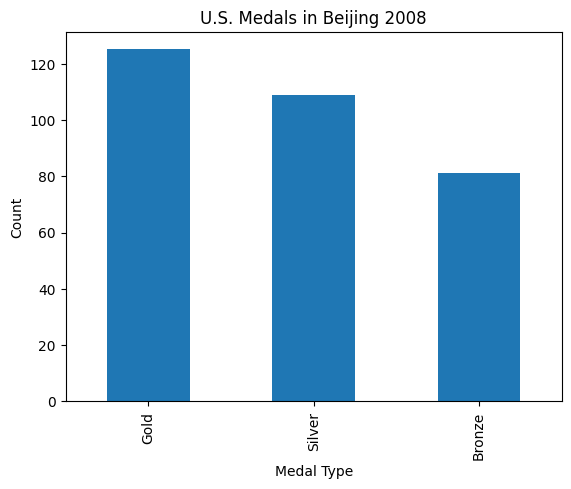

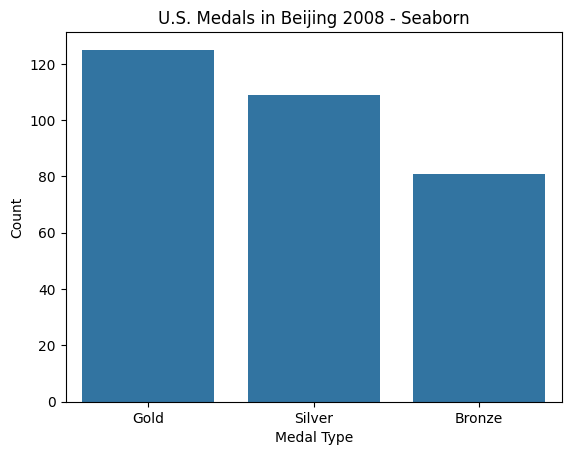

In [7]:
us_bejing_medals_2008 = df[(df['NOC'] == 'USA') & (df['Edition'] == 2008)]
us_medals_count = us_bejing_medals_2008['Medal'].value_counts()

plt.figure()
us_medals_count.plot(kind='bar')
plt.title('U.S. Medals in Beijing 2008')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.show()

plt.figure()
sns.barplot(x=us_medals_count.index, y=us_medals_count.values)
plt.title('U.S. Medals in Beijing 2008 - Seaborn')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.show()


##### Top ten individual medal earners.

In [8]:
top_ten = df['Athlete'].value_counts().head(10)
print(top_ten)

Athlete
LATYNINA, Larisa        18
PHELPS, Michael         16
ANDRIANOV, Nikolay      15
ONO, Takashi            13
MANGIAROTTI, Edoardo    13
SHAKHLIN, Boris         13
TORRES, Dara            12
FISCHER, Birgit         12
THOMPSON, Jenny         12
NEMOV, Alexei           12
Name: count, dtype: int64


##### Top five medal earning countries.

In [9]:
top_five_countries = df['NOC'].value_counts().head(5)
print(top_five_countries)

NOC
USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
Name: count, dtype: int64


##### Number of medals for each olympics throughout history.

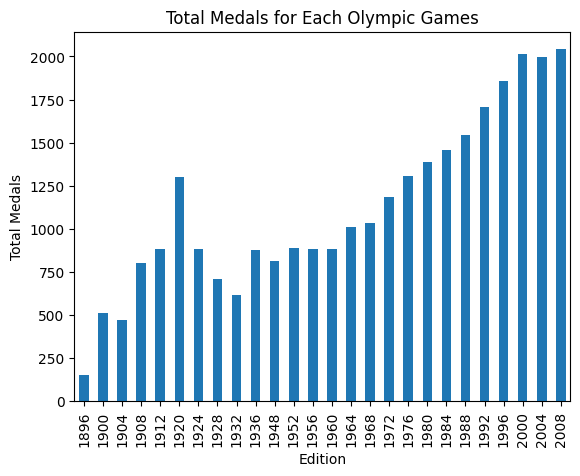

In [10]:
olympic_medals_awarded = df.groupby('Edition')['Medal'].count()

plt.figure()
olympic_medals_awarded.plot(kind='bar')
plt.title('Total Medals for Each Olympic Games')
plt.xlabel('Edition')
plt.ylabel('Total Medals')
plt.show()

##### Gold medals for U.S., China, Mexico, Japan, France, and Canada.